(C) Copyright 2024 IBM

Any modifications or derivative works of this code must retain this
copyright notice, and modified files need to carry a notice indicating
that they have been altered from the originals.

This code is associated to the paper "Diagonalization of large many-body Hamiltonians on a quantum processor" [https://arxiv.org/abs/2407.14431](https://arxiv.org/abs/2407.14431).

In [2]:
import numpy as np
import itertools as it
import sys
from scipy.optimize import curve_fit
from qiskit.quantum_info import SparsePauliOp
import matplotlib.pyplot as plt

sys.path.append('..')
from utils import optimize_threshold

In [4]:
# INPUTS

noise_scales = [1, 1.5, 3]

dt = 0.5

H = SparsePauliOp(['IIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIXI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIXIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIII', 'IIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIII', 'IIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'XXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIXII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIXIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIII', 'IIIIIIIIIYIIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIYIIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIYIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIYIIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIYIIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIYIIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIYIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIYIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIYIIYIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIYIYIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIYIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIYIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIYIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIY', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIYI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIYIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIYIIIIIIIIII', 'IIIIIIYIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIYIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIYIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIYIIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IYIIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIYIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIYIYIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIYIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIYIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIYIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIY', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIYIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIYIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIYIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIYIIIIII', 'IIYIIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIYIIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'YYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIYIIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIYIIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIYIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIYIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIYIIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIYIIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIYIYIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIYIIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIYIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIYII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIYIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIYIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIYIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIYIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIYIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYY', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIYIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIYIIIIIIII', 'IIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIZI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIZIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIII', 'IIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIII', 'IIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIZII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIZIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIII'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])

S_meas = SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII'],
              coeffs=[1.+0.j, 0.+1.j])

H_meas = SparsePauliOp(['IIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIXIXIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIXIXIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIXIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIXIIX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIXIIXI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIXIIXIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIXIIXIIIIIIIIII', 'IIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIXIXIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIXIX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIXIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIXIXIIIIII', 'IIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'XXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIXIIXII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIXIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIXIIXIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIXIXIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIXX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIXIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIXIXIIIIIIII', 'IIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIXIXIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIXIXIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIYIXIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIXIIX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIXIIXI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIXIIXIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIXIIXIIIIIIIIII', 'IIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIXIXIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIXIX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIXIXIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIXIXIIIIII', 'IIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'XXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIXIIXII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXYIIXIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIXIIXIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIXIXIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIXX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYXIIXIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIXIXIIIIIIII', 'IIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIZIZIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIZIZIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIXIZIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIZIIZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIZIIZI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIZIIZIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIZIIZIIIIIIIIII', 'IIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIZIZIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIZIZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIZIZIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIZIZIIIIII', 'IIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIZIIZII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZXIIZIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIZIIZIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIZIZIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXZIIZIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIZIZIIIIIIII', 'IIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIZIZIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIZIZIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIYIZIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIZIIZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIZIIZI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIZIIZIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIZIIZIIIIIIIIII', 'IIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIZIZIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIZIZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIZIZIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIZIZIIIIII', 'IIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIZIIZII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZYIIZIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIZIIZIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIZIZIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYZIIZIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIZIZIIIIIIII'],
              coeffs=[2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j,
 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j,
 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j,
 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j,
 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j,
 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j,
 0.+1.j, 0.+1.j, 0.+1.j])

all_meas = SparsePauliOp(['IIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIXIXIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIXIXIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIXIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIXIIX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIXIIXI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIXIIXIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIXIIXIIIIIIIIII', 'IIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIXIXIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIXIX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIXIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIXIXIIIIII', 'IIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'XXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIXIIXII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIXIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIXIIXIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIXIXIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIXX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIXIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIXIXIIIIIIII', 'IIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIXIXIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIXIXIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIYIXIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIXIIX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIXIIXI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIXIIXIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIXIIXIIIIIIIIII', 'IIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIXIXIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIXIX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIXIXIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIXIXIIIIII', 'IIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'XXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIXIIXII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXYIIXIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIXIIXIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIXIXIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIXX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYXIIXIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIXIXIIIIIIII', 'IIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIZIZIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIZIZIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIXIZIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIZIIZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIZIIZI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIZIIZIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIZIIZIIIIIIIIII', 'IIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIZIZIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIZIZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIZIZIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIZIZIIIIII', 'IIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIZIIZII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZXIIZIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIZIIZIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIZIZIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXZIIZIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIZIZIIIIIIII', 'IIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIZIZIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIZIZIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIYIZIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIZIIZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIZIIZI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIZIIZIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIZIIZIIIIIIIIII', 'IIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIZIZIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIZIZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIZIZIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIZIZIIIIII', 'IIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIZIIZII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZYIIZIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIZIIZIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIZIZIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYZIIZIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIZIZIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIII'],
              coeffs=[2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j,
 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j,
 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j,
 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j,
 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j,
 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j,
 0.+1.j, 0.+1.j, 0.+1.j, 1.+0.j, 0.+1.j])

In [32]:
# Post-processing bootstraps

# WARNING: SLOW

identifier = 'ibm_montecarlo_11162023_110741'

D = 10

n_resample=960

def exp_fun(x, a, b):
    return a*np.exp(-b * x) 

def lin_fun(x, a, b):
    return a*x + b


bootstrap_samples_H, bootstrap_samples_S = [], []

for sample in range(n_resamples):
    print('{} of {}'.format(sample, n_resamples))
    
    boot_experiment_expvals = np.load('data/boot_expvals_resampled_twirls_{}.npy'.format(sample), allow_pickle=True).tolist()
    boot_experiment_expvals_err = np.load('data/boot_stddevs_resampled_twirls_{}.npy'.format(sample), allow_pickle=True).tolist()


    boot_extrapolted_exp_vals_all_terms, boot_extrapolted_exp_vals_err_all_terms = [], []
    for exp_idx in range(len(boot_experiment_expvals[1])):
        extrapolted_exp_vals, extrapolted_exp_vals_err = {}, {}
        for pauli in all_meas.paulis.to_labels():
            noise_expvals, noise_expvals_err = [], []
            for noise in noise_scales:
                noise_expvals.append(boot_experiment_expvals[noise][exp_idx][pauli])
                noise_expvals_err.append(float(boot_experiment_expvals_err[noise][exp_idx][pauli]))

            popt_lin, pcov_lin = curve_fit(lin_fun, noise_scales, noise_expvals, sigma=noise_expvals_err, absolute_sigma=True, maxfev=10000000)
            expval_lin = popt_lin[-1]
            expval_lin_error = np.sqrt(np.diag(pcov_lin))[-1]
            r_lin = np.array(noise_expvals) - lin_fun(np.array(noise_scales), *popt_lin)
            expval_lin_chisqr = np.sum((r_lin/noise_expvals_err)**2)

            popt_exp, pcov_exp = curve_fit(exp_fun, noise_scales, noise_expvals, sigma=noise_expvals_err, absolute_sigma=True, maxfev=10000000)
            expval_exp = popt_exp[0] #+ popt_exp[-1]
            expval_exp_error = np.sqrt(np.diag(pcov_exp))[0]
            r_exp = np.array(noise_expvals) - exp_fun(np.array(noise_scales), *popt_exp)
            expval_exp_chisqr = np.sum((r_exp/noise_expvals_err)**2)

            expval_lin_confined = False 
    #         if abs(expval_lin - np.sign(expval_lin)*3*expval_lin_error) <= 1:
            if abs(expval_lin) + 0*abs(expval_lin_error) <= 1 + 0*abs(expval_lin_error):
                expval_lin_confined =True

            expval_exp_confined = False 
    #         if abs(expval_exp - np.sign(expval_exp)*3*expval_exp_error) <= 1:
            if abs(expval_exp) + 0*abs(expval_exp_error) <= 1 + 0*abs(expval_exp_error):
                expval_exp_confined = True 

            if expval_lin_confined & expval_exp_confined: # if both extrapolated expvals have valid pauli expvals
                if expval_lin_chisqr < expval_exp_chisqr: # check if lin fit has lower chi_sqr
                    extrapolted_exp_vals[pauli] = expval_lin
                    extrapolted_exp_vals_err[pauli] = expval_lin_error

                else:
                    if abs(expval_exp_error/expval_exp) > 0.5: # check if exp extrapolation error is too high
                        extrapolted_exp_vals[pauli] = expval_lin
                        extrapolted_exp_vals_err[pauli] = expval_lin_error  
                    else:
                        extrapolted_exp_vals[pauli] = expval_exp
                        extrapolted_exp_vals_err[pauli] = expval_exp_error

            else:
                if expval_lin_confined:

                    extrapolted_exp_vals[pauli] = expval_lin
                    extrapolted_exp_vals_err[pauli] = expval_lin_error  
                else:

                    extrapolted_exp_vals[pauli] = expval_exp
                    extrapolted_exp_vals_err[pauli] = expval_exp_error




            if not(expval_lin_confined) and not(expval_exp_confined):
                print(pauli, 'beyond ideal values')

        boot_extrapolted_exp_vals_all_terms.append(extrapolted_exp_vals)
        boot_extrapolted_exp_vals_err_all_terms.append(extrapolted_exp_vals_err)

    relative_phases = [np.exp(-1j*sum([c for p,c in H.to_list() if 'Z' in p])*i*dt/2) for i in range(11)]

    all_meas = H_meas + S_meas

    # Assemble H_D, the Krylov Hamiltonian matrix of dimension D:
    H_D_first_row = np.zeros(10, dtype=complex)


    # In the weight-optimized case, all of the terms are measured w.r.t. the same circuit, so we get to add them all at once.
    for i, exp_vals in enumerate(boot_extrapolted_exp_vals_all_terms):
        # Get the coefficients and expectation values corresponding to actual terms in the Hamiltonian (as opposed to the ancilla-only measurements).
        H_D_first_row[i] += relative_phases[i+1]*sum(coeff*val for coeff, val in zip(H_meas.coeffs, [exp_vals[p.to_label()] for p in H_meas.paulis]))

    ###################### add d=0 element
    H_D_first_row = np.array([53+0j]+H_D_first_row.tolist())
    ########################   

#         print(H_D_first_row)

    H_D = np.zeros((10, 10), dtype=complex)

    # Distribute entries from first row across matrix:
    for i,j in it.product(range(10),repeat=2):
        if i >= j:
            H_D[j,i] = H_D_first_row[i-j]
        else:
            H_D[j,i] = np.conj(H_D_first_row[j-i])



    # Assemble S_D, the overlap matrix of dimension D:
    S_D_first_row = np.zeros(10, dtype=complex)

    # Add in ancilla-only measurements:
    for i, exp_vals in enumerate(boot_extrapolted_exp_vals_all_terms):
        # Get the coefficients and expectation values corresponding to actual terms in the Hamiltonian (as opposed to the ancilla-only measurements).
        S_D_first_row[i] += relative_phases[i+1]*sum(coeff*val for coeff, val in zip(S_meas.coeffs, [exp_vals[p.to_label()] for p in S_meas.paulis]))

    ###################### add d=0 element
    S_D_first_row = np.array([1+0j]+S_D_first_row.tolist())
    ########################   

    S_D = np.zeros((10, 10), dtype=complex)

    # Distribute entries from first row across matrix:
    for i,j in it.product(range(10),repeat=2):
        if i >= j:
            S_D[j,i] = S_D_first_row[i-j]
        else:
            S_D[j,i] = np.conj(S_D_first_row[j-i])




    bootstrap_samples_H.append(H_D)
    bootstrap_samples_S.append(S_D)

    np.save('data/bootstrap_samples_H_resampled_twirls', bootstrap_samples_H)
    np.save('data/bootstrap_samples_S_resampled_twirls', bootstrap_samples_S)

0 of 960
1 of 960
2 of 960
3 of 960
4 of 960
5 of 960
6 of 960
7 of 960


/var/folders/_4/6l94f14x4fngr6ncf9lb59100000gn/T/ipykernel_36357/828895117.py:56: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_exp, pcov_exp = curve_fit(exp_fun, noise_scales, noise_expvals, sigma=noise_expvals_err, absolute_sigma=True, maxfev=10000000)
/var/folders/_4/6l94f14x4fngr6ncf9lb59100000gn/T/ipykernel_36357/828895117.py:69: RuntimeWarning: invalid value encountered in scalar multiply
  if abs(expval_exp) + 0*abs(expval_exp_error) <= 1 + 0*abs(expval_exp_error):


8 of 960
9 of 960
10 of 960
11 of 960
12 of 960
13 of 960
14 of 960
15 of 960
16 of 960
17 of 960
18 of 960
19 of 960
20 of 960
21 of 960
22 of 960
23 of 960
24 of 960
25 of 960
26 of 960
27 of 960
28 of 960
29 of 960
30 of 960
31 of 960
32 of 960
33 of 960
34 of 960
35 of 960
36 of 960
37 of 960
38 of 960
39 of 960
40 of 960
41 of 960
42 of 960
43 of 960
44 of 960
45 of 960
46 of 960
47 of 960
48 of 960
49 of 960
50 of 960
51 of 960
52 of 960
53 of 960
54 of 960
55 of 960
56 of 960
57 of 960
58 of 960
59 of 960
60 of 960
61 of 960
62 of 960
63 of 960
64 of 960
65 of 960
66 of 960
67 of 960
68 of 960
69 of 960
70 of 960
71 of 960
72 of 960
73 of 960
74 of 960
75 of 960
76 of 960
77 of 960
78 of 960
79 of 960
80 of 960
81 of 960
82 of 960
83 of 960
84 of 960
85 of 960
86 of 960
87 of 960
88 of 960
89 of 960
90 of 960
91 of 960
92 of 960
93 of 960
94 of 960
95 of 960
96 of 960
97 of 960
98 of 960
99 of 960
100 of 960
101 of 960
102 of 960
103 of 960
104 of 960
105 of 960
106 of 960
107 o

In [5]:
exact_gse = 47.3

In [6]:
# Load exact simulation data

D = 10

Hmat_exact_firstrow = [
    53.0, 
    30.38251154488351-27.017146319900196j,
    0.3130485358190853-12.874576222935925j,
    3.9158439542539094+10.561998233501312j,
    15.972687489725613+6.886690983258884j,
    8.432718475135333-3.1322160152992127j,
    0.08166415895985776-0.5853714084066027j,
    0.4725017753604137-3.250425667284142j,
    -8.475121785884317-10.686092479341665j,
    -16.841257165321576-2.8566387249927447j
]

Smat_exact_firstrow = [
    1.0,
    0.5941823860087223-0.48406959522814885j,
    0.048329716780385085-0.23416058242256818j,
    0.09739651555398773+0.18703929141916908j,
    0.30137102200107246+0.12993858638951272j,
    0.16276928014191724-0.04619837507559989j,
    0.005694930183527692-0.008137576871189958j,
    -0.004414681419382411-0.060353753844968536j,
    -0.1760043896784318-0.18642793768777144j,
    -0.3193322832682056-0.041917820462630456j
]

H_D_ideal = np.zeros((10, 10), dtype=complex)

# Distribute entries from first row across matrix:
for i,j in it.product(range(10),repeat=2):
    if i >= j:
        H_D_ideal[j,i] = Hmat_exact_firstrow[i-j]
    else:
        H_D_ideal[j,i] = np.conj(Hmat_exact_firstrow[j-i]) 

S_D_ideal = np.zeros((10, 10), dtype=complex)

# Distribute entries from first row across matrix:
for i,j in it.product(range(10),repeat=2):
    if i >= j:
        S_D_ideal[j,i] = Smat_exact_firstrow[i-j]
    else:
        S_D_ideal[j,i] = np.conj(Smat_exact_firstrow[j-i])



threshold, ideal_energies, copt = optimize_threshold(D, H_D_ideal, S_D_ideal, 0, fit_tol=0.5, init_threshold=1e-12, skip_D=0, dimn_scaling=1)

init_threshold too high


In [7]:
bootstrap_samples_H = np.load('data/bootstrap_samples_H_paper.npy', allow_pickle=True)
bootstrap_samples_S = np.load('data/bootstrap_samples_S_paper.npy', allow_pickle=True)

0
SKIPPING THIS RESAMPLE 2 WHOLE SUBSPACE ILL-CONDITIONED
1
SKIPPING THIS RESAMPLE 2 WHOLE SUBSPACE ILL-CONDITIONED
2
0.004186667483186504
3
0.04837805717930523
4
SKIPPING THIS RESAMPLE 2 WHOLE SUBSPACE ILL-CONDITIONED
5
0.044794497388245584
6
0.027996560867653494
7
0.13375565248934307
8
SKIPPING THIS RESAMPLE 2 WHOLE SUBSPACE ILL-CONDITIONED
9
0.004186667483186504
10
0.025922741544123606
11
0.009375991588586376
12
0.021602284620103007
13
init_threshold too high
1.0000000000000002e-08
14
SKIPPING THIS RESAMPLE 2 WHOLE SUBSPACE ILL-CONDITIONED
15
SKIPPING THIS RESAMPLE 2 WHOLE SUBSPACE ILL-CONDITIONED
16
SKIPPING THIS RESAMPLE 2 WHOLE SUBSPACE ILL-CONDITIONED
17
0.004186667483186504
18
0.044794497388245584
19
0.03732874782353799
20
SKIPPING THIS RESAMPLE 2 WHOLE SUBSPACE ILL-CONDITIONED
21
0.023330467389711246
22
0.0150015865417382
23
0.031107289852948326
24
SKIPPING THIS RESAMPLE 2 WHOLE SUBSPACE ILL-CONDITIONED
25
0.031107289852948326
26
init_threshold too high
1.0000000000000002e-08


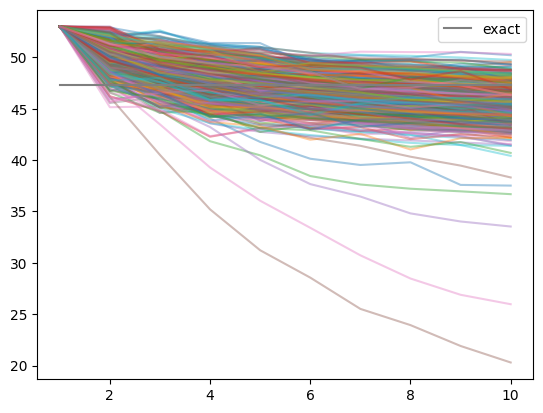

In [8]:
# Get energy curves from bootstraps

D = len(bootstrap_samples_H[0])
bootstrap_samples = len(bootstrap_samples_H)
bootstrap_samples_gs_en = []
thresholds = []
copts = []
low_eig_S = []
skipped = 0
for idx in range(bootstrap_samples):#[13]:#

    H_boot = bootstrap_samples_H[idx]
    S_boot = bootstrap_samples_S[idx]
            
    eig_vals, eig_vec = np.linalg.eig(S_boot)
    low_eig_S.append(min(np.real(eig_vals)))

    # low_pos_eig = min(eig for eig in eig_vals if eig >= 0)
    # diag_rescaling = 1-low_pos_eig
    # H_boot = H_boot - np.eye(D) * low_pos_eig * H_boot[0,0]
    # S_boot = S_boot - np.eye(D) * low_pos_eig

    print(idx)

    gs_en_estimates = []

    # for _d in range(1, D+1):
    #     h = get_partial_matrix(H_boot, range(_d))
    #     s = get_partial_matrix(S_boot, range(_d))

    #     gs_en_estimates.append(solve_regularized_gen_eig(h, s, k=1, threshold=_d*(0.1+max(min(np.linalg.eigvalsh(S_boot)), 0))))
    # bootstrap_samples_gs_en.append(gs_en_estimates)
    
    try:
        threshold, gs_en_estimates, copt = optimize_threshold(D, H_boot, S_boot, 0, fit_tol=0.5, init_threshold=1e-8, skip_D=0, dimn_scaling=1)
        print(threshold)
        # if all(gs_en_estimates[i+1]<gs_en_estimates[i] for i in range(D-1)):
        if all(gs_en_estimates[i] <= gs_en_estimates[0] for i in range(D-1)):
            bootstrap_samples_gs_en.append(gs_en_estimates)
            thresholds.append(threshold)
            copts.append(copt)
        else:
            print('SKIPPING THIS RESAMPLE 1')
            skipped += 1
    except Exception as e:
        print('SKIPPING THIS RESAMPLE 2', e)
        skipped += 1

print('SKIPPED', skipped)

for gs_en_estimates in bootstrap_samples_gs_en:
    plt.plot(range(1,D+1), gs_en_estimates, alpha=0.4)
plt.plot(range(1,D+1), [exact_gse]*D, label = 'exact')

# f = lambda x, a, b: (H_boot[0,0]-a)*np.exp(-b*(x-1)) + a
# plt.plot(np.arange(1,D+0.1,0.1), [f(x,*copt) for x in np.arange(1,D+0.1,0.1)], alpha=0.4)
# plt.plot(range(1,D+1), ideal_energies[:D])

plt.legend()
plt.show()

In [9]:
len([t for t in thresholds if t<1.1e-8])

170

In [35]:
# np.save('bootstrap_energies_resampled_twirls', bootstrap_samples_gs_en)
# bootstrap_samples_gs_en = np.load('bootstrap_energies_resampled_twirls.npy')

In [10]:
# GET RAW (non-bootstrapped) EXPERIMENTAL RESULTS

identifier = 'ibm_montecarlo_11162023_110741'

experiment_expvals = np.load('data/experiment_expvals_{}.npy'.format(identifier), allow_pickle=True).tolist()
experiment_expvals_err = np.load('data/experiment_expvals_err_{}.npy'.format(identifier), allow_pickle=True).tolist()



def exp_fun(x, a, b):
    return a*np.exp(-b * x) 

def lin_fun(x, a, b):
    return a*x + b



boot_extrapolted_exp_vals_all_terms, boot_extrapolted_exp_vals_err_all_terms = [], []
for exp_idx in range(len(experiment_expvals[1])):
    extrapolted_exp_vals, extrapolted_exp_vals_err = {}, {}
    for pauli in all_meas.paulis.to_labels():
        noise_expvals, noise_expvals_err = [], []
        for noise in noise_scales:
            noise_expvals.append(experiment_expvals[noise][exp_idx][pauli])
            noise_expvals_err.append(float(experiment_expvals_err[noise][exp_idx][pauli]))
        noise_scales = np.array(noise_scales)

        popt_lin, pcov_lin = curve_fit(lin_fun, noise_scales, noise_expvals, sigma=noise_expvals_err, absolute_sigma=True, maxfev=10000000)
        expval_lin = popt_lin[-1]
        expval_lin_error = np.sqrt(np.diag(pcov_lin))[-1]
        r_lin = np.array(noise_expvals) - lin_fun(np.array(noise_scales), *popt_lin)
        expval_lin_chisqr = np.sum((r_lin/noise_expvals_err)**2)

        popt_exp, pcov_exp = curve_fit(exp_fun, noise_scales, noise_expvals, sigma=noise_expvals_err, absolute_sigma=True, maxfev=10000000)
        expval_exp = popt_exp[0] #+ popt_exp[-1]
        expval_exp_error = np.sqrt(np.diag(pcov_exp))[0]
        r_exp = np.array(noise_expvals) - exp_fun(np.array(noise_scales), *popt_exp)
        expval_exp_chisqr = np.sum((r_exp/noise_expvals_err)**2)

        expval_lin_confined = False 
#         if abs(expval_lin - np.sign(expval_lin)*3*expval_lin_error) <= 1:
        if abs(expval_lin) + 0*abs(expval_lin_error) <= 1 + 0*abs(expval_lin_error):
            expval_lin_confined =True

        expval_exp_confined = False 
#         if abs(expval_exp - np.sign(expval_exp)*3*expval_exp_error) <= 1:
        if abs(expval_exp) + 0*abs(expval_exp_error) <= 1 + 0*abs(expval_exp_error):
            expval_exp_confined = True 

        if expval_lin_confined & expval_exp_confined: # if both extrapolated expvals have valid pauli expvals

            if expval_lin_chisqr < expval_exp_chisqr: # check if lin fit has lower chi_sqr
                extrapolted_exp_vals[pauli] = expval_lin
                extrapolted_exp_vals_err[pauli] = expval_lin_error

            elif abs(expval_exp_error/expval_exp) > 1: # check if exp extrapolation error is too high
                extrapolted_exp_vals[pauli] = expval_lin
                extrapolted_exp_vals_err[pauli] = expval_lin_error  
            else:
                extrapolted_exp_vals[pauli] = expval_exp
                extrapolted_exp_vals_err[pauli] = expval_exp_error

        else:
            if expval_lin_confined:

                extrapolted_exp_vals[pauli] = expval_lin
                extrapolted_exp_vals_err[pauli] = expval_lin_error  
            else:

                extrapolted_exp_vals[pauli] = expval_exp
                extrapolted_exp_vals_err[pauli] = expval_exp_error




        if not(expval_lin_confined) and not(expval_exp_confined):
            print(pauli, 'beyond ideal values')

    boot_extrapolted_exp_vals_all_terms.append(extrapolted_exp_vals)
    boot_extrapolted_exp_vals_err_all_terms.append(extrapolted_exp_vals_err)

relative_phases = [np.exp(-1j*sum([c for p,c in H.to_list() if 'Z' in p])*i*dt/2) for i in range(11)]

all_meas = H_meas + S_meas

# Assemble H_D, the Krylov Hamiltonian matrix of dimension D:
H_D_orig_first_row = np.zeros(10, dtype=complex)

# In the weight-optimized case, all of the terms are measured w.r.t. the same circuit, so we get to add them all at once.
for i, exp_vals in enumerate(boot_extrapolted_exp_vals_all_terms):
    # Get the coefficients and expectation values corresponding to actual terms in the Hamiltonian (as opposed to the ancilla-only measurements).
    H_D_orig_first_row[i] += relative_phases[i+1]*sum(coeff*val for coeff, val in zip(H_meas.coeffs, [exp_vals[p.to_label()] for p in H_meas.paulis]))

###################### add d=0 element
H_D_orig_first_row = np.array([53+0j]+H_D_orig_first_row.tolist())
########################   

#         print(H_D_first_row)

H_orig = np.zeros((10, 10), dtype=complex)

# Distribute entries from first row across matrix:
for i,j in it.product(range(10),repeat=2):
    if i >= j:
        H_orig[j,i] = H_D_orig_first_row[i-j]
    else:
        H_orig[j,i] = np.conj(H_D_orig_first_row[j-i])


# Assemble S_D, the overlap matrix of dimension D:
S_D_orig_first_row = np.zeros(10, dtype=complex)

# Add in ancilla-only measurements:
for i, exp_vals in enumerate(boot_extrapolted_exp_vals_all_terms):
    # Get the coefficients and expectation values corresponding to actual terms in the Hamiltonian (as opposed to the ancilla-only measurements).
    S_D_orig_first_row[i] += relative_phases[i+1]*sum(coeff*val for coeff, val in zip(S_meas.coeffs, [exp_vals[p.to_label()] for p in S_meas.paulis]))

###################### add d=0 element
S_D_orig_first_row = np.array([1+0j]+S_D_orig_first_row.tolist())
########################   

S_orig = np.zeros((10, 10), dtype=complex)

# Distribute entries from first row across matrix:
for i,j in it.product(range(10),repeat=2):
    if i >= j:
        S_orig[j,i] = S_D_orig_first_row[i-j]
    else:
        S_orig[j,i] = np.conj(S_D_orig_first_row[j-i])

In [12]:
# Process output of above cell:

H_D_orig_first_row = [(53+0j), (28.53243242620816-23.93681631283742j), (-0.9300576639977634-10.753389975553505j), (-0.11246875706883808+8.941112296949655j), (11.049108548308691+7.875540794875025j), (5.562558165066114-1.293347733393773j), (0.06115350708695841-0.33129569579826834j), (1.6175142148754384-1.8851939198149856j), (-2.89671456191702-9.294979431561785j), (-12.710337817438932-5.864613496630863j)]
S_D_orig_first_row = [(1+0j), (0.6163602782185176-0.4108927828531177j), (0.025490943630504123-0.20647783736493808j), (0.028182751990161688+0.18716857323004765j), (0.23364913531039705+0.1664104846509838j), (0.1355040970990385-0.013686204215073203j), (0.01146682732372411-0.0026024095920627226j), (0.023711761977310244-0.05125606237197507j), (-0.09766579402920672-0.19127720795146952j), (-0.25169499034171483-0.08049025004347005j)]

H_orig = np.zeros((D,D), dtype=complex)

# Distribute entries from first row across matrix:
for i,j in it.product(range(D),repeat=2):
    if i >= j:
        H_orig[j,i] = H_D_orig_first_row[i-j]
    else:
        H_orig[j,i] = np.conj(H_D_orig_first_row[j-i])

S_orig = np.zeros((D,D), dtype=complex)

# Distribute entries from first row across matrix:
for i,j in it.product(range(D),repeat=2):
    if i >= j:
        S_orig[j,i] = S_D_orig_first_row[i-j]
    else:
        S_orig[j,i] = np.conj(S_D_orig_first_row[j-i])

In [13]:
# Get experimental energy curve
threshold, gs_en_orig, copt = optimize_threshold(D, H_orig, S_orig, 0, fit_tol=0.5, init_threshold=1e-8, skip_D=0, dimn_scaling=1)
print(threshold)

init_threshold too high
1.0000000000000002e-08


In [14]:
# Print lowest eigenvalue of each principal submatrix of S, divided by its dimension
for d in range(1,11):
    print(min([v for v in np.linalg.eigvalsh(S_orig[:d,:d]) if v>0])/d)

1.0
0.1296174708607369
0.015313565324508872
0.05956249358347992
0.019748660431418357
0.006987396348206225
0.018262694601983157
0.008576456283743364
0.003060410332997782
0.008799823142717964


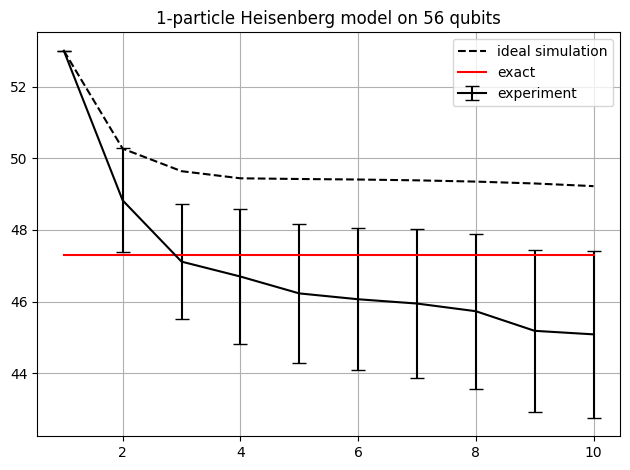

In [15]:
stds = np.apply_along_axis(np.std, 0, bootstrap_samples_gs_en)
plt.errorbar(range(1,D+1), gs_en_orig, stds, label='experiment', color='k', capsize=5)

plt.plot(range(1,D+1), ideal_energies[:D], label='ideal simulation', color='k', linestyle='dashed')
plt.plot(range(1,D+1), [exact_gse]*D, label = 'exact', color='r')
# plt.plot(range(1,D+1), gs_en_orig, label='orig')

# plt.xlabel('Krylov dimension')
# plt.ylabel('Ground state energy estimate')

plt.grid()
plt.legend(loc='upper right')
plt.title('1-particle Heisenberg model on 56 qubits')

plt.tight_layout()
plt.savefig('1_particle_fig.pdf')

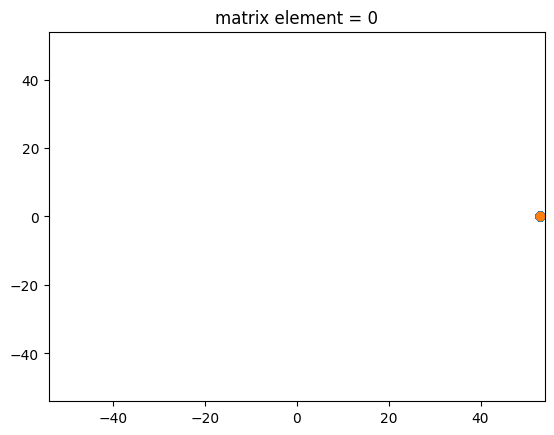

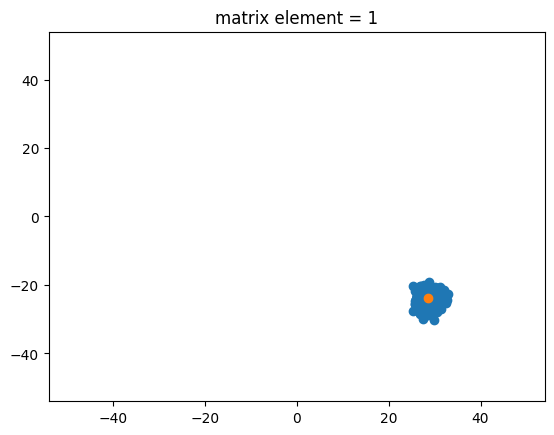

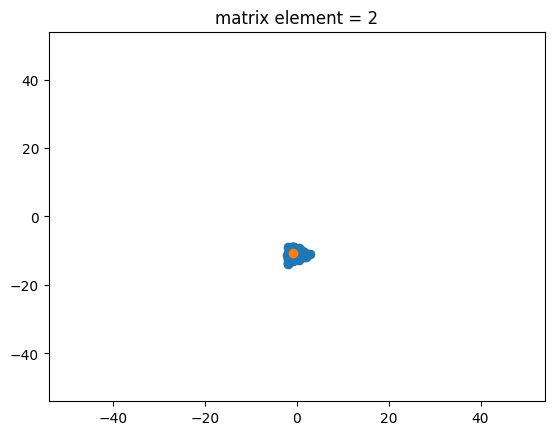

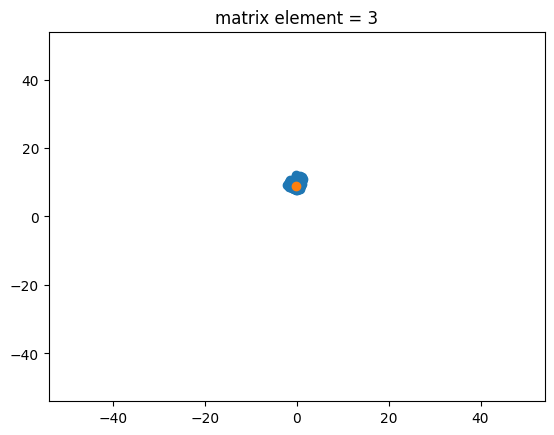

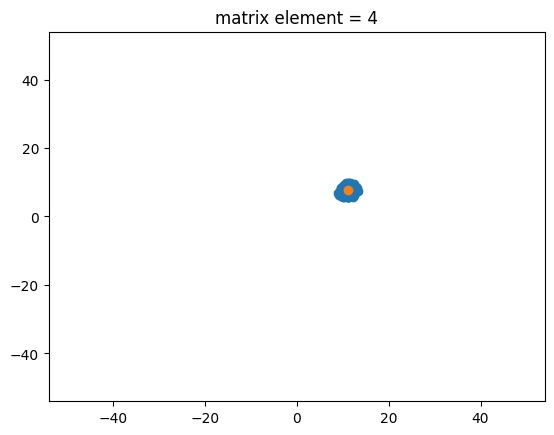

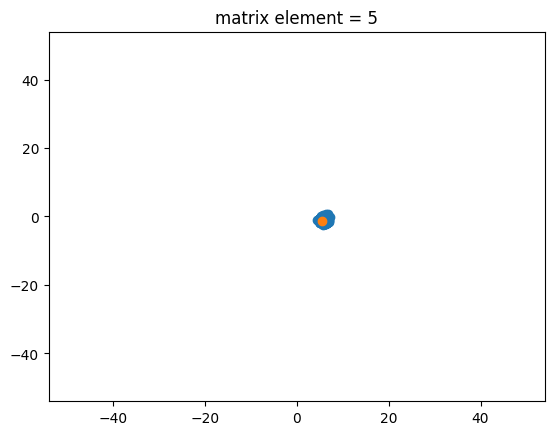

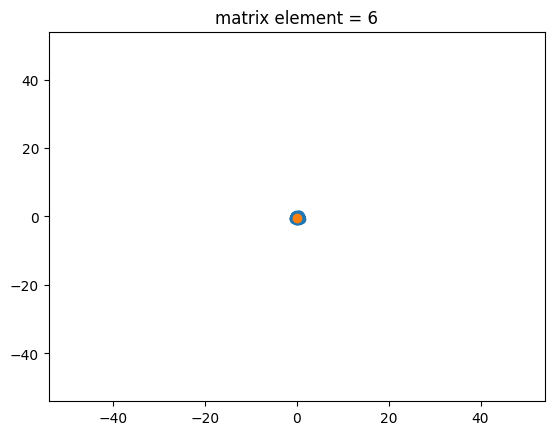

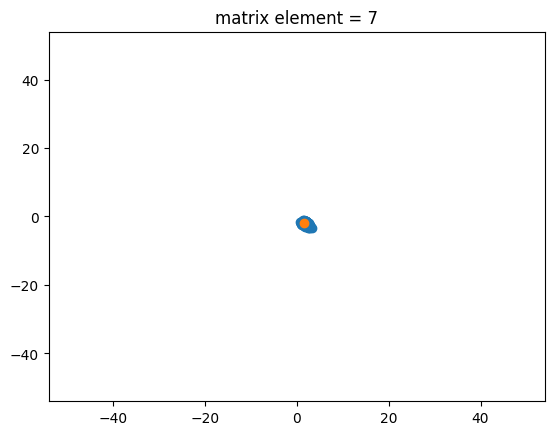

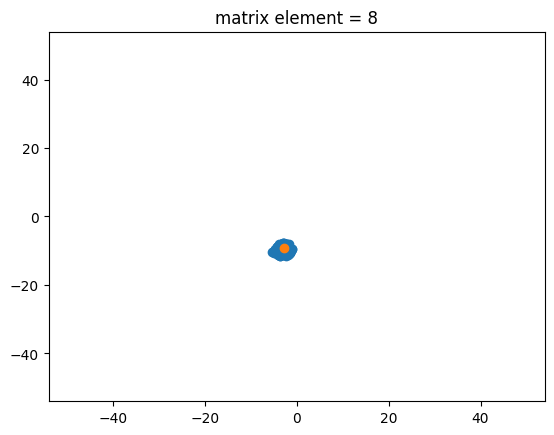

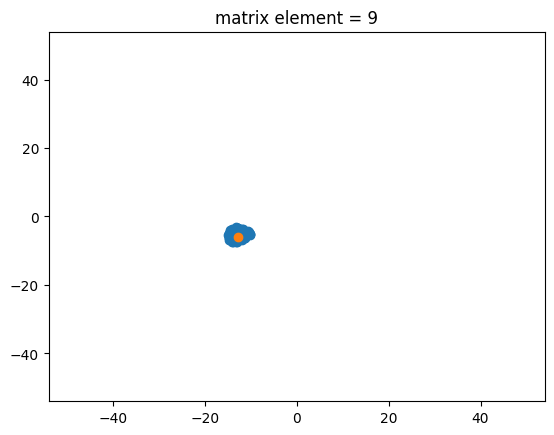

In [16]:
# Compare raw with bootstraps for each matrix element in H

bootstrap_samples = 960

entries_H_first_row = [[] for _ in range(D)]

for idx in range(bootstrap_samples):#[13]:#
    H_boot = bootstrap_samples_H[idx]
    for i in range(D):
        entries_H_first_row[i].append(H_boot[0][i])

for i in range(D):
    plt.scatter([np.real(entries_H_first_row[i][j]) for j in range(bootstrap_samples)], [np.imag(entries_H_first_row[i][j]) for j in range(bootstrap_samples)])
    plt.scatter([np.real(H_orig[0][i])], [np.imag(H_orig[0][i])])
    plt.xlim((-54,54))
    plt.ylim((-54,54))
    plt.title('matrix element = {}'.format(i))
    plt.show()

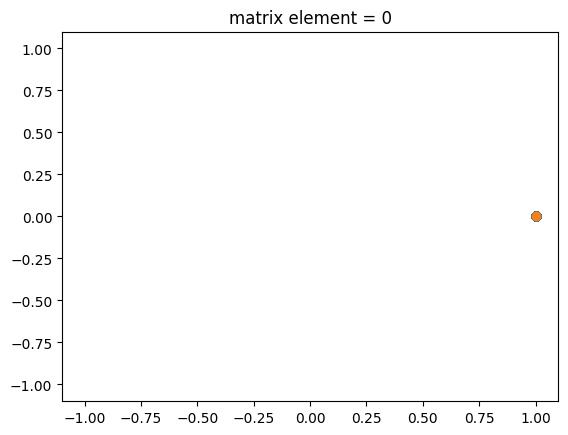

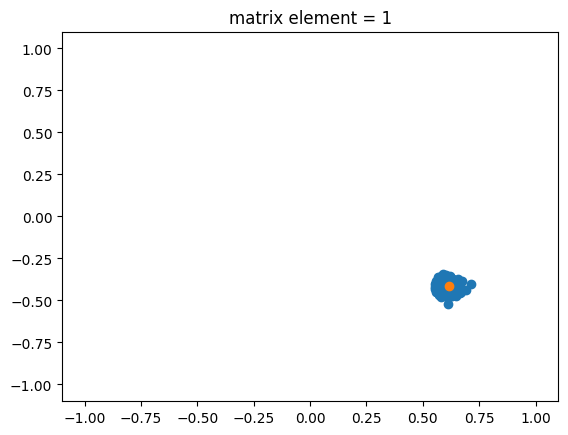

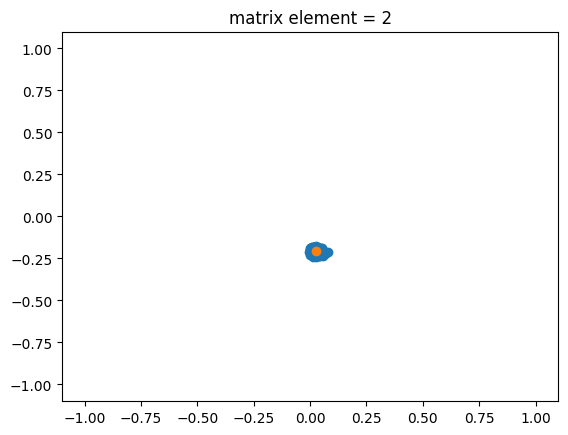

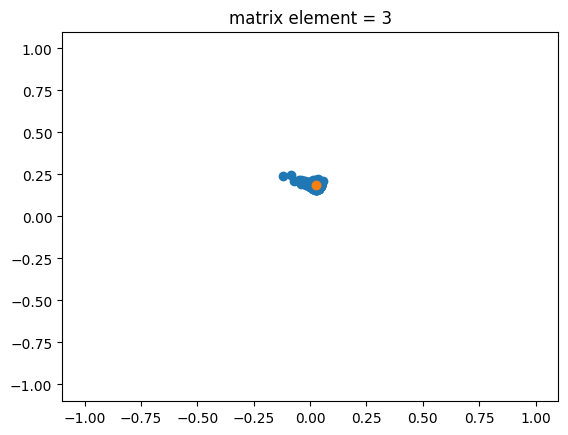

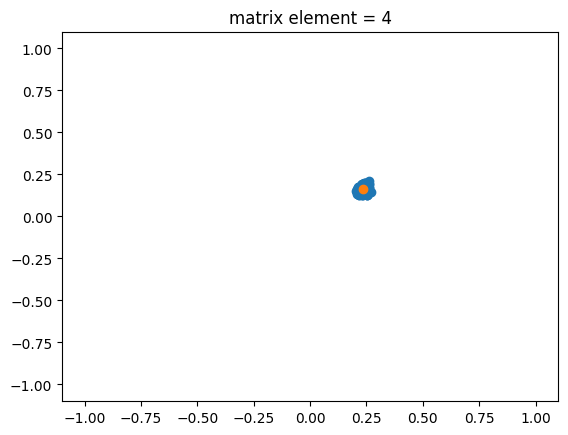

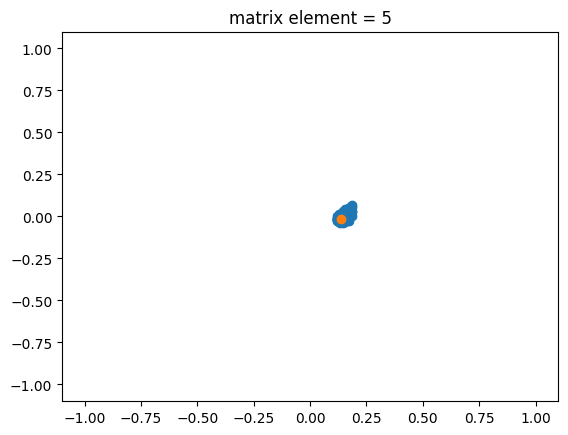

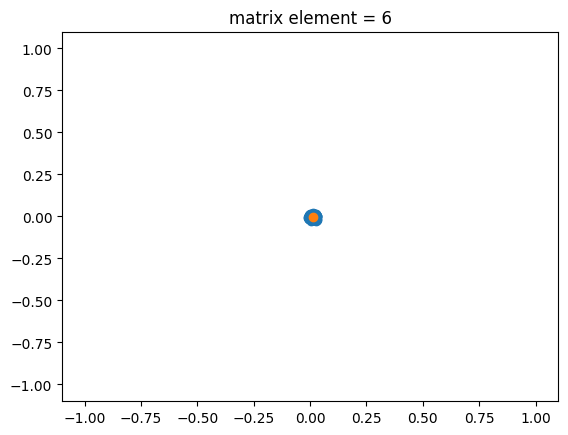

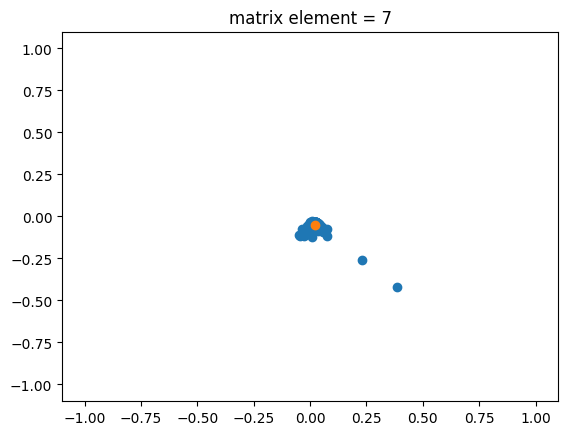

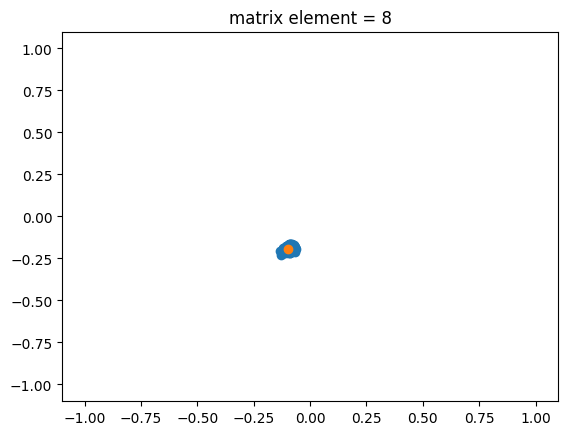

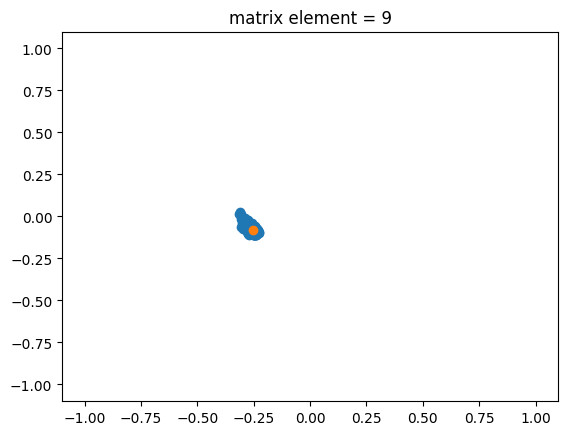

In [17]:
# Compare raw with bootstraps for each matrix element in S

bootstrap_samples = 960

entries_S_first_row = [[] for _ in range(D)]

for idx in range(bootstrap_samples):#[13]:#
    S_boot = bootstrap_samples_S[idx]
    for i in range(D):
        entries_S_first_row[i].append(S_boot[0][i])

for i in range(D):
    plt.scatter([np.real(entries_S_first_row[i][j]) for j in range(bootstrap_samples)], [np.imag(entries_S_first_row[i][j]) for j in range(bootstrap_samples)])
    plt.scatter([np.real(S_orig[0][i])], [np.imag(S_orig[0][i])])
    plt.xlim((-1.1,1.1))
    plt.ylim((-1.1,1.1))
    plt.title('matrix element = {}'.format(i))
    plt.show()